<a href="https://colab.research.google.com/github/DS-Ankit/DataSciencealgorithm/blob/master/Housingprice_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing Library
import numpy as np 
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.linear_model import LassoCV# for regularization
from sklearn import metrics 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [0]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

Inspecting Imported Data

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


checking Dimensions of data.

In [7]:
print("Train Data Dimensions: {}".format(train.shape))
print("Test Data Dimensions: {}".format(test.shape))

Train Data Dimensions: (1460, 81)
Test Data Dimensions: (1459, 80)


Next we check Skweness and kurtosis of data

Skewness: 1.882876
Kurtosis: 6.536282


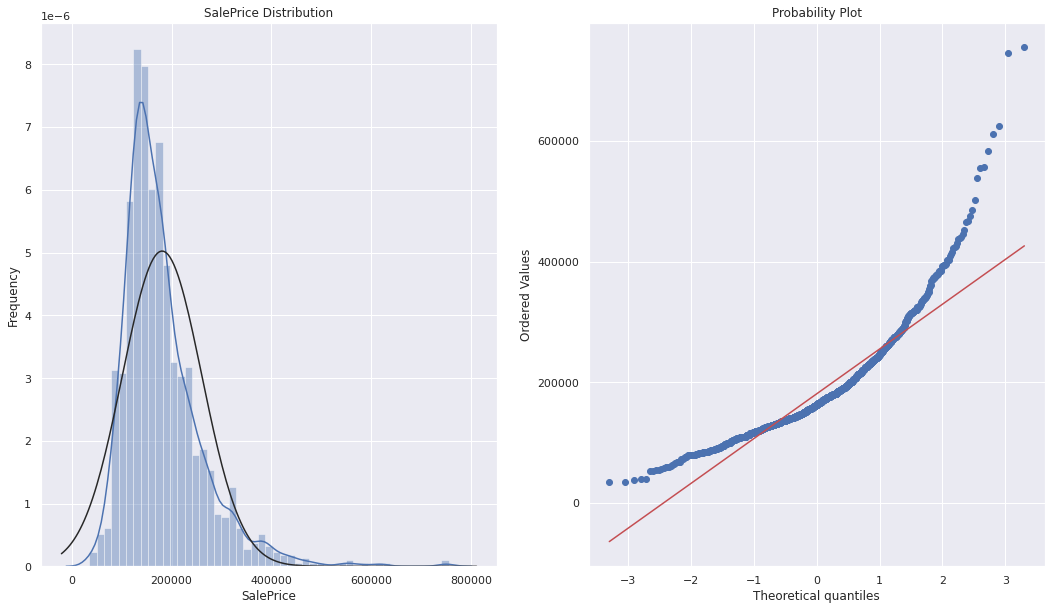

In [8]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

Skewness
It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution.
It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.

Positive Skewness means when the tail on the right side of the distribution is longer or fatter. The mean and median will be greater than the mode.
Negative Skewness is when the tail of the left side of the distribution is longer or fatter than the tail on the right side. The mean and median will be less than the mode.
So, when is the skewness too much?
The rule of thumb seems to be:
If the skewness is between -0.5 and 0.5, the data are fairly symmetrical.
If the skewness is between -1 and -0.5(negatively skewed) or between 0.5 and 1(positively skewed), the data are moderately skewed.
If the skewness is less than -1(negatively skewed) or greater than 1(positively skewed), the data are highly skewed.


Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.


Reasons a right-skewed predictive variable is bad:
Mean greater than mode
Median greater than mode
Mean is greater than median
This eventually can affect the performance of our modelling process, so we will decide to log-transform it in the next step.

In [0]:
train['SalePrice'] = np.log1p(train['SalePrice'])

Skewness: 0.121347
Kurtosis: 0.809519


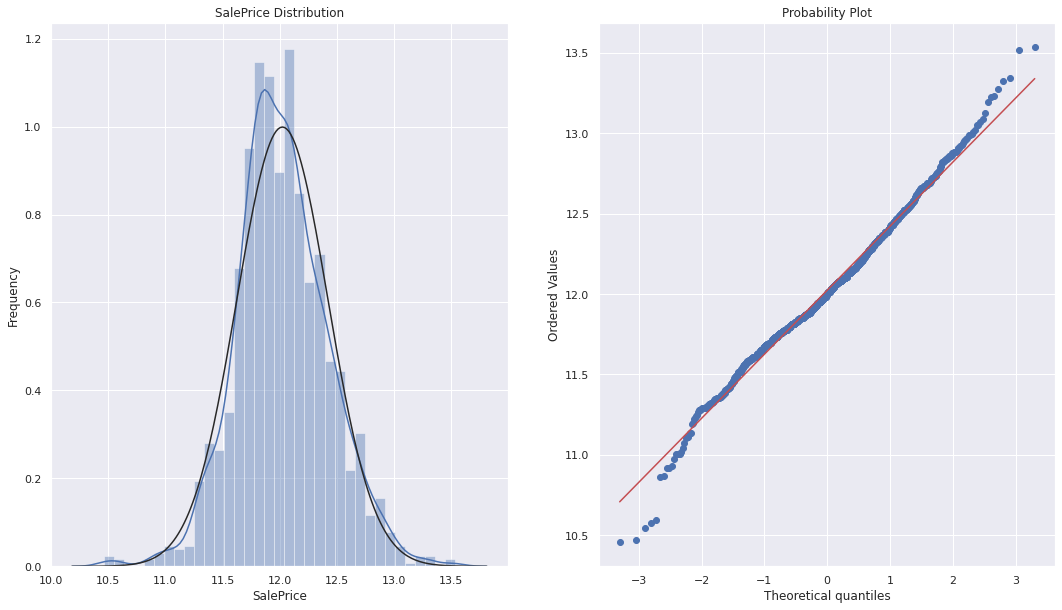

In [10]:
# Print out Skewness and Kurtosis after log trnasform
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

figure = plt.figure(figsize=(18,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);
(mu, sigma) = norm.fit(train['SalePrice'])
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')

plt.subplot(1,2,2)
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

 Univariate Analysis
In the name 'Univariate Analysis' 'Uni' means one, and 'variate' means variable, meaning that Univariate analysis is analysis of one feature. This procedure basically tells us the distribution of each feature and information about its mean, median, and mode. This is our first step to detecting outliers.

In [0]:
numerical_features = train.select_dtypes(exclude='object').drop(['SalePrice'], axis=1)


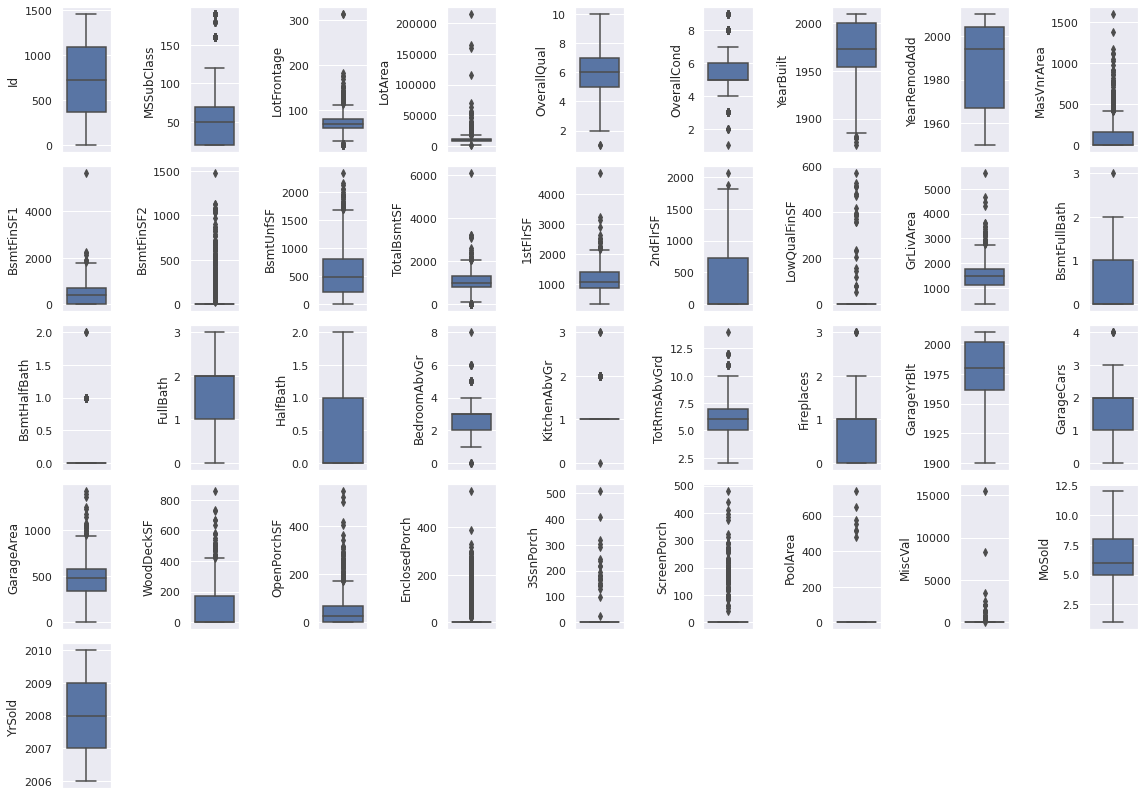

In [22]:
fig = plt.figure(figsize=(16,20))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 9, i+1)
    sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show()

Bivariate Analysis
Bivariate Analysis is a procedure but with two variables (hence the name 'Bi'), not one. This is our second step to detecting outliers


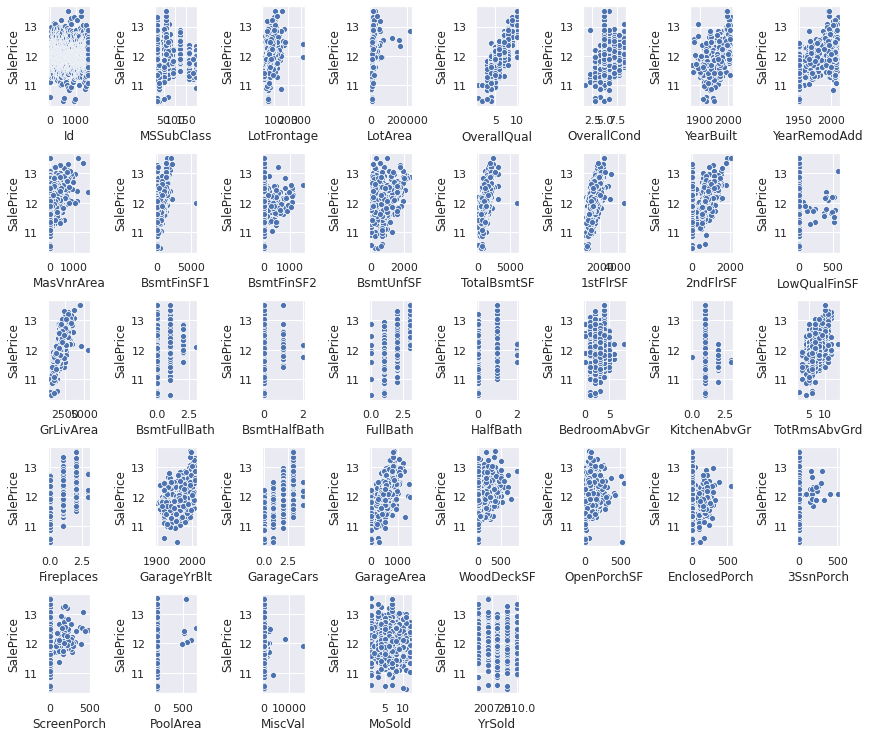

In [24]:
fig = plt.figure(figsize=(12,18))
for i in range(len(numerical_features.columns)):
    fig.add_subplot(9, 8, i+1)
    sns.scatterplot(numerical_features.iloc[:, i],train['SalePrice'])
plt.tight_layout()
plt.show()

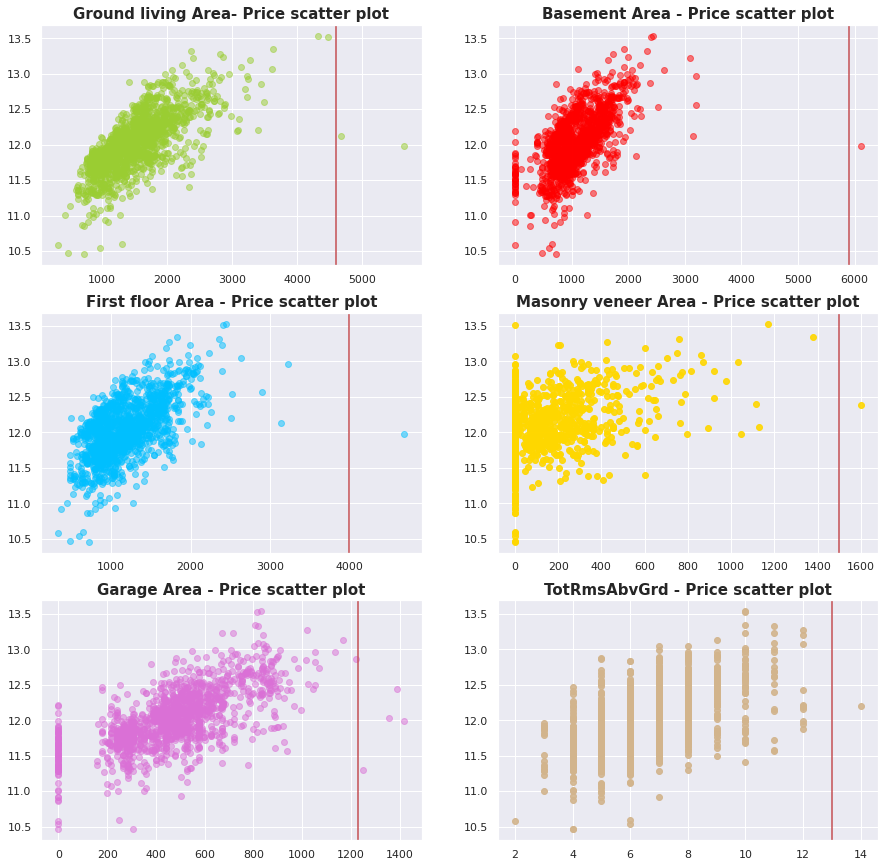

In [26]:

fig = plt.figure(figsize=(15,15))
ax1 = plt.subplot2grid((3,2),(0,0))
plt.scatter(x=train['GrLivArea'], y=train['SalePrice'], color=('yellowgreen'), alpha=0.5)
plt.axvline(x=4600, color='r', linestyle='-')
plt.title('Ground living Area- Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(0,1))
plt.scatter(x=train['TotalBsmtSF'], y=train['SalePrice'], color=('red'),alpha=0.5)
plt.axvline(x=5900, color='r', linestyle='-')
plt.title('Basement Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,0))
plt.scatter(x=train['1stFlrSF'], y=train['SalePrice'], color=('deepskyblue'),alpha=0.5)
plt.axvline(x=4000, color='r', linestyle='-')
plt.title('First floor Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(1,1))
plt.scatter(x=train['MasVnrArea'], y=train['SalePrice'], color=('gold'),alpha=0.9)
plt.axvline(x=1500, color='r', linestyle='-')
plt.title('Masonry veneer Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,0))
plt.scatter(x=train['GarageArea'], y=train['SalePrice'], color=('orchid'),alpha=0.5)
plt.axvline(x=1230, color='r', linestyle='-')
plt.title('Garage Area - Price scatter plot', fontsize=15, weight='bold' )

ax1 = plt.subplot2grid((3,2),(2,1))
plt.scatter(x=train['TotRmsAbvGrd'], y=train['SalePrice'], color=('tan'),alpha=0.9)
plt.axvline(x=13, color='r', linestyle='-')
plt.title('TotRmsAbvGrd - Price scatter plot', fontsize=15, weight='bold' )
plt.show()

using IQR Rule
It states that a data point is an outlier if:
It is below the First Quadrant (Q1) subtracted by (1.5 x IQR)
It is above the Third Quadrant (Q3) added by (1.5 x IQR)

In [0]:
pos = [1298,523, 297]
train.drop(train.index[pos], inplace=True)

In [30]:
train.shape

(1457, 81)

In [0]:
# target value for later
y = train.SalePrice.values

In [0]:
# to make imputing easier, we combine train and test data
train.drop(['SalePrice'], axis=1, inplace=True)
dataset = pd.concat((train, test)).reset_index(drop=True)

In [34]:
dataset.shape

(2916, 80)

In [35]:
na_percent = (dataset.isnull().sum()/len(dataset))[(dataset.isnull().sum()/len(dataset))>0].sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage':na_percent*100})
missing_data

,Missing Percentage
PoolQC,99.691358
MiscFeature,96.399177
Alley,93.244170
Fence,80.418381
FireplaceQu,48.696845
LotFrontage,16.666667
GarageFinish,5.452675
GarageYrBlt,5.452675
GarageQual,5.452675
GarageCond,5.452675


for better visulization

Text(0.5, 1.0, 'Percentage Missing')

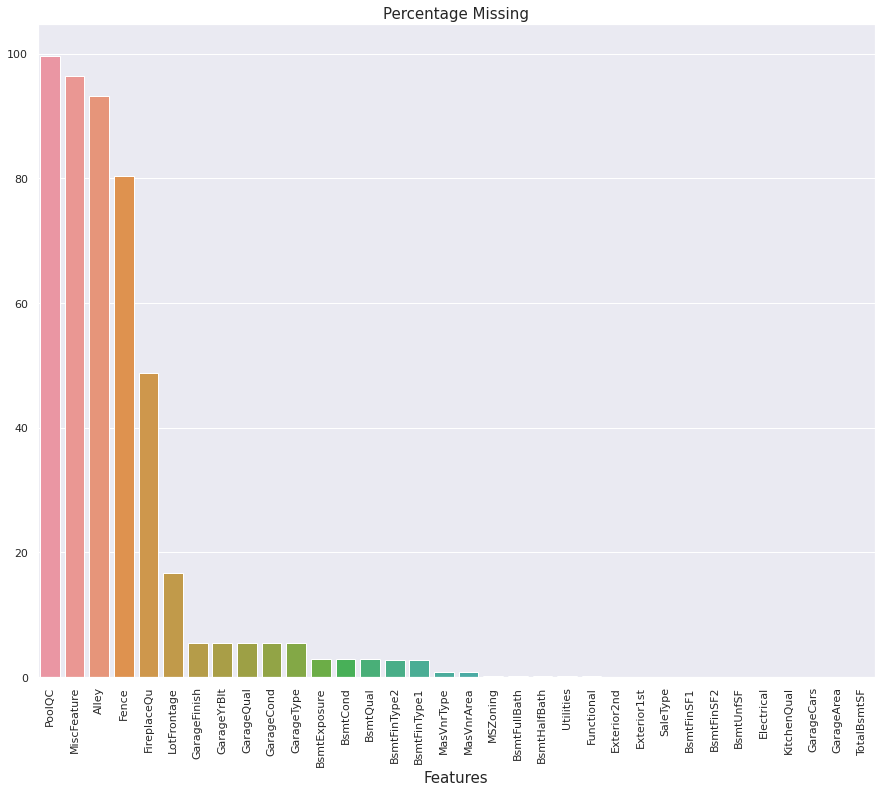

In [36]:
na = (dataset.isnull().sum() / len(dataset)) * 100
na = na.drop(na[na == 0].index).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(15,12))
sns.barplot(x=na.index, y=na)
plt.xticks(rotation='90')
plt.xlabel('Features', fontsize=15)
plt.title('Percentage Missing', fontsize=15)

In [37]:
dataset[na.index].dtypes

PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageFinish     object
GarageYrBlt     float64
GarageQual       object
GarageCond       object
GarageType       object
BsmtExposure     object
BsmtCond         object
BsmtQual         object
BsmtFinType2     object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
MSZoning         object
BsmtFullBath    float64
BsmtHalfBath    float64
Utilities        object
Functional       object
Exterior2nd      object
Exterior1st      object
SaleType         object
BsmtFinSF1      float64
BsmtFinSF2      float64
BsmtUnfSF       float64
Electrical       object
KitchenQual      object
GarageCars      float64
GarageArea      float64
TotalBsmtSF     float64
dtype: object

FireplaceQu doesn't exist, therefore it probably means that there was no Fireplace for that house

In [0]:
#imputing with None
for col in ('FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC', 'MSSubClass'):
    dataset[col] = dataset[col].fillna('None')

features with their Mode

The reason we fill in these features with their mode (most common value) is because these features are mandatory in a house, meaning that if these values are missing it has to be because of the data, not because of the fact that the house is missing the feature.
Ex: For the 'Electrical' feature we fill in the most common value because every house has electricity, therefore it wouldn't make sense for there to be any missing values

In [0]:
for col in ('Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'Functional', 'MSZoning', 'SaleType', 'Utilities'):
    dataset[col] = dataset[col].fillna(dataset[col].mode()[0])

A Garage-Related Feature with a missing value usually indicates there is no Garage

In [0]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    dataset[col] = dataset[col].fillna(0)
    
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    dataset[col] = dataset[col].fillna('None')

A Basement-Related Feature with a missing value usually indicates there is no Basement

In [0]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    dataset[col] = dataset[col].fillna(0)

for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    dataset[col] = dataset[col].fillna('None')

In [42]:
dataset.isnull().sum()[dataset.isnull().sum() > 0].sort_values(ascending=False)

LotFrontage    486
MasVnrType      24
MasVnrArea      23
dtype: int64

'MasVnrType' is a categorical feature that we need to impute with 'None'
'MasVnrArea' is a categorical feature that we need to impute with 'MasVnrType'

In [0]:
dataset['MasVnrType'] = dataset['MasVnrType'].fillna('None')
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(0)

In [0]:
# LotFrontage is correlated to the 'Neighborhood' feature because the LotFrontage for nearby houses will be really 
# similar, so we fill in missing values by the median based off of Neighborhood
dataset["LotFrontage"] = dataset.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [45]:
na_percent = (dataset.isnull().sum()/len(dataset))[(dataset.isnull().sum()/len(dataset))>0].sort_values(ascending=False)

missing_data = pd.DataFrame({'Missing Percentage':na_percent})
missing_data

,Missing Percentage


Next Feature Engineering


Feature engineering is the process of using domain knowledge to extract features from raw data via data mining techniques. These features can be used to improve the performance of machine learning algorithms

In [46]:
list(dataset.select_dtypes(exclude='object').columns)

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

Changing the types of some of the features

In [0]:
# Features 'MSSubClass', 'YrSold', 'OverallCond' and 'MoSold' are supposed to be categorical features so change their type
dataset['MSSubClass'] = dataset['MSSubClass'].apply(str)
dataset['YrSold'] = dataset['YrSold'].apply(str)
dataset['MoSold'] = dataset['MoSold'].apply(str)
dataset['OverallCond'] = dataset['OverallCond'].astype(str)

# Features 'LotArea' and 'MasVnrArea' are supposed to be numerical features so change their type
dataset['LotArea'] = dataset['LotArea'].astype(np.int64)
dataset['MasVnrArea'] = dataset['MasVnrArea'].astype(np.int64)

Visualize 'TotalBsmtSF' and '2ndFlrSF' and them together, Create 'TotalSF' for total surface area with those features

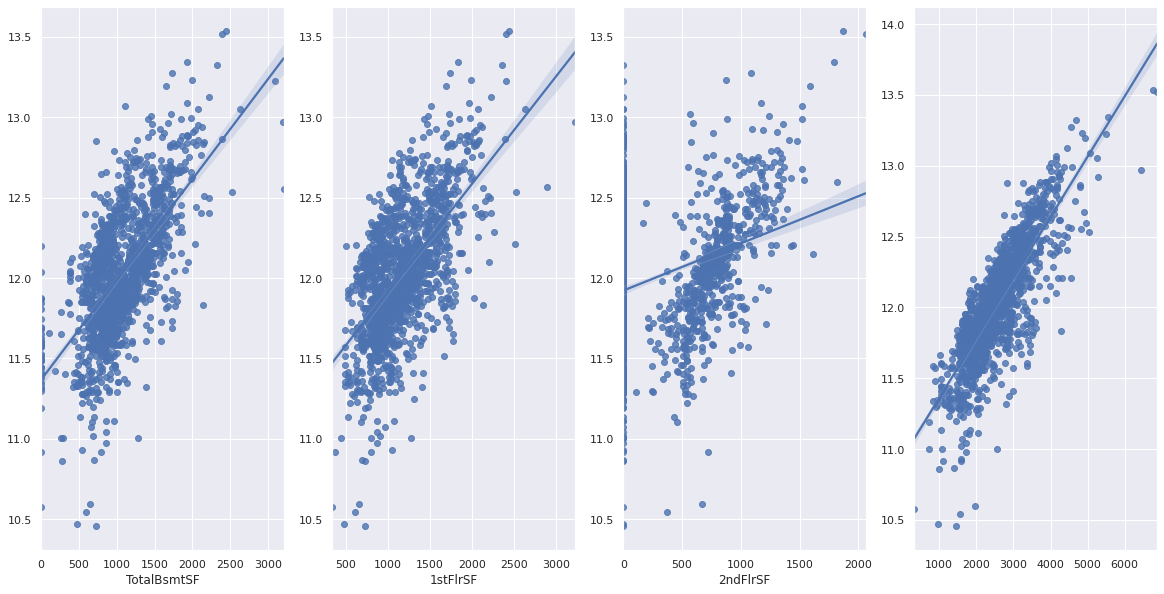

In [49]:
figure, (ax1, ax2, ax3,ax4) = plt.subplots(nrows=1, ncols=4)
figure.set_size_inches(20,10)
_ = sns.regplot(train['TotalBsmtSF'], y, ax=ax1)
_ = sns.regplot(train['1stFlrSF'], y, ax=ax2)
_ = sns.regplot(train['2ndFlrSF'], y, ax=ax3)
_ = sns.regplot(train['TotalBsmtSF'] + train['2ndFlrSF']+train['1stFlrSF'], y, ax=ax4)

In [0]:
dataset['TotalSF']=dataset['TotalBsmtSF']  + dataset['1stFlrSF'] + dataset['2ndFlrSF']


Visualize 'BsmtFullBath', 'FullBath', 'BsmtHalfBath' and them together, Create 'TotalBath' for total number of bathrooms using those features

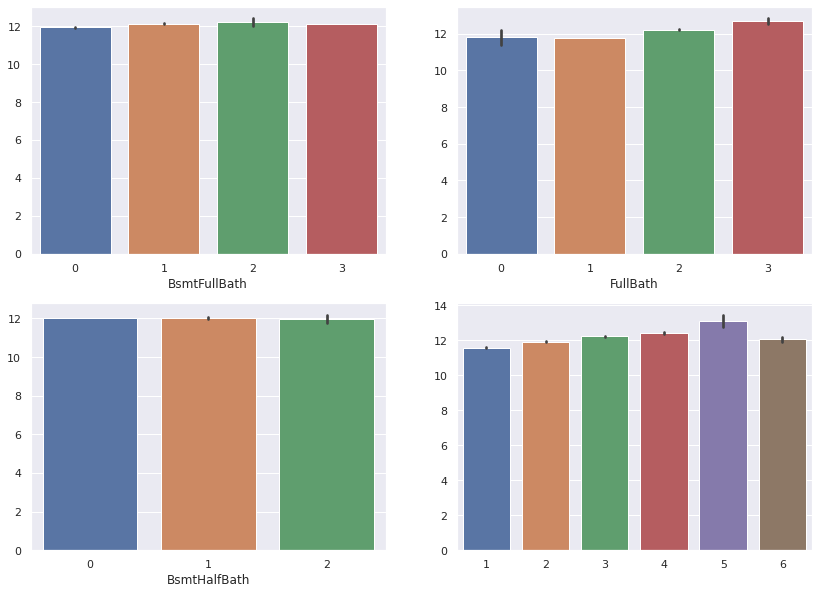

In [52]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14,10)
_ = sns.barplot(train['BsmtFullBath'], y, ax=ax1)
_ = sns.barplot(train['FullBath'], y, ax=ax2)
_ = sns.barplot(train['BsmtHalfBath'], y, ax=ax3)
_ = sns.barplot(train['BsmtFullBath'] + train['FullBath'] + train['BsmtHalfBath'] + train['HalfBath'], y, ax=ax4)

In [0]:
dataset['TotalBath']=dataset['BsmtFullBath'] + dataset['FullBath'] + (0.5*dataset['BsmtHalfBath']) + (0.5*dataset['HalfBath'])

Visualize 'YearBuilt', 'YearRemodAdd', and them together, Create 'YrBltAndRemod' for Year Built and Year remodel combined using those features

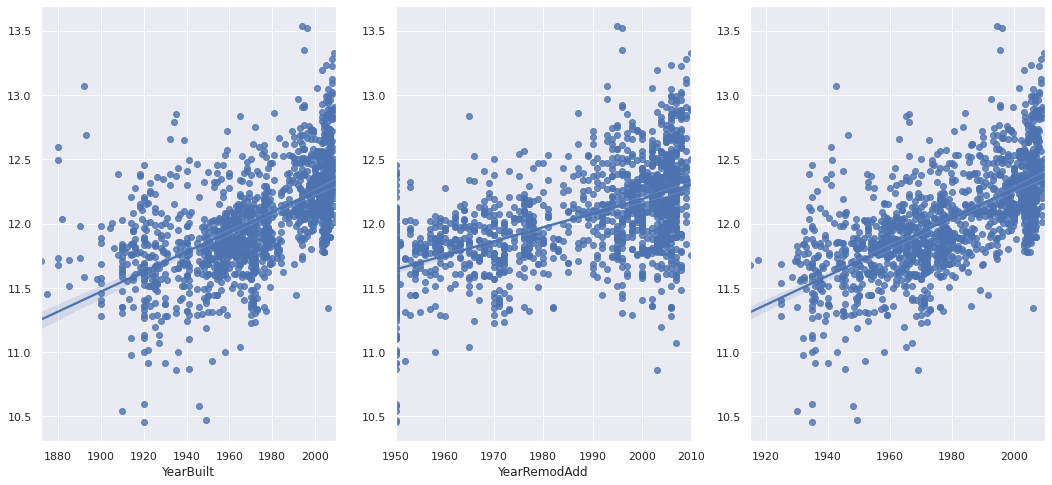

In [54]:
figure, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
figure.set_size_inches(18,8)
_ = sns.regplot(train['YearBuilt'], y, ax=ax1)
_ = sns.regplot(train['YearRemodAdd'],y, ax=ax2)
_ = sns.regplot((train['YearBuilt']+train['YearRemodAdd'])/2, y, ax=ax3)

In [0]:
dataset['YrBltAndRemod']=dataset['YearBuilt']+dataset['YearRemodAdd']

Visualize 'OpenPorchSF', '3SsnPorch', 'EnclosedPorch', 'ScreenPorch', 'WoodDeckSF' and them together, Create 'Porch_SF' for total porch surface using those features

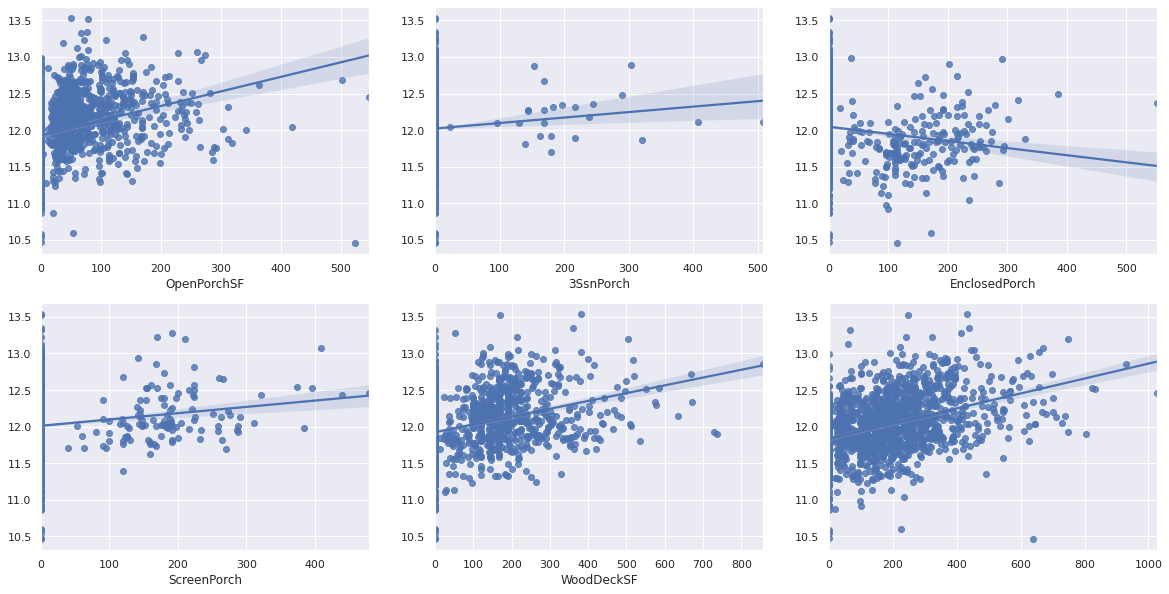

In [57]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(20,10)
_ = sns.regplot(train['OpenPorchSF'], y, ax=ax1)
_ = sns.regplot(train['3SsnPorch'], y, ax=ax2)
_ = sns.regplot(train['EnclosedPorch'], y, ax=ax3)
_ = sns.regplot(train['ScreenPorch'], y, ax=ax4)
_ = sns.regplot(train['WoodDeckSF'], y, ax=ax5)
_ = sns.regplot((train['OpenPorchSF']+train['3SsnPorch']+train['EnclosedPorch']+train['ScreenPorch']+train['WoodDeckSF']), y, ax=ax6)

In [0]:
dataset['Porch_SF'] = (dataset['OpenPorchSF'] + dataset['3SsnPorch'] + dataset['EnclosedPorch'] + dataset['ScreenPorch'] + dataset['WoodDeckSF'])


Creating useful extra features in order to strongly distinct data

such as: 'Has2ndfloor' feature below indicates whether there is a 2ndfloor or not

In [0]:
dataset['Has2ndfloor'] = dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasBsmt'] = dataset['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasFirePlace'] =dataset['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
dataset['Has2ndFlr']=dataset['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
dataset['HasPool']=dataset['PoolArea'].apply(lambda x: 1 if x > 0 else 0)

dataset cannot run with categorical columns so we must Label Encode these columns in order to make them numerical

In [60]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for col in categorical_col:
    label = LabelEncoder() 
    label.fit(list(dataset[col].values)) 
    dataset[col] = label.transform(list(dataset[col].values))

print('Shape all_data: {}'.format(dataset.shape))

Shape all_data: (2916, 89)


 Checking Skew

In [62]:
num_features = dataset.dtypes[dataset.dtypes != 'object'].index
skewed_features = dataset[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewness' :skewed_features})
skewness.head(15)

,Skewness
MiscVal,21.935910
PoolArea,17.685603
HasPool,15.492067
LotArea,13.107732
LowQualFinSF,12.082427
3SsnPorch,11.370087
LandSlope,4.972302
KitchenAbvGr,4.299698
BsmtFinSF2,4.143683
EnclosedPorch,4.001570


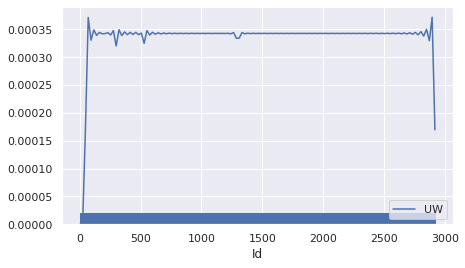

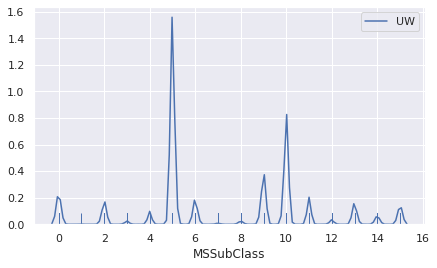

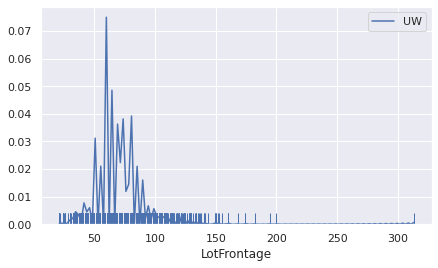

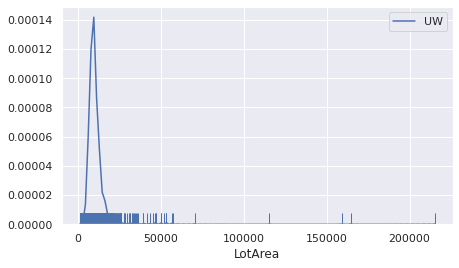

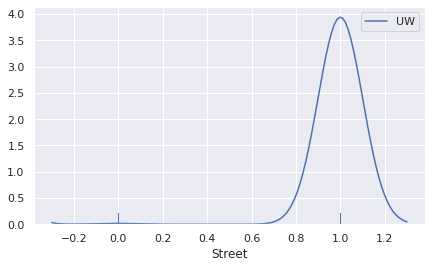

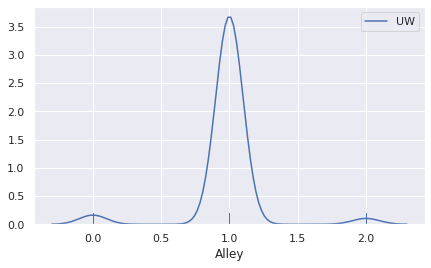

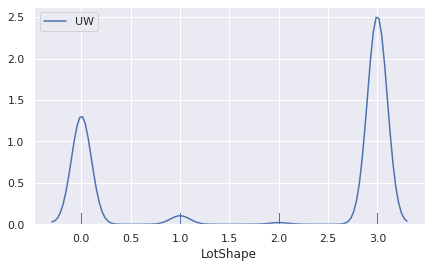

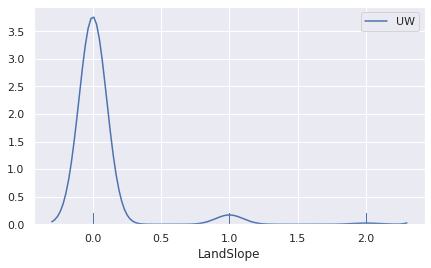

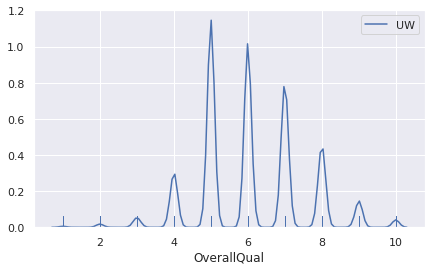

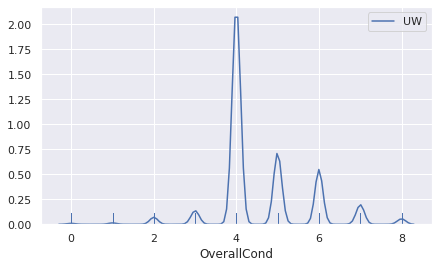

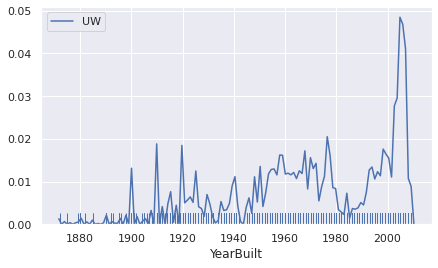

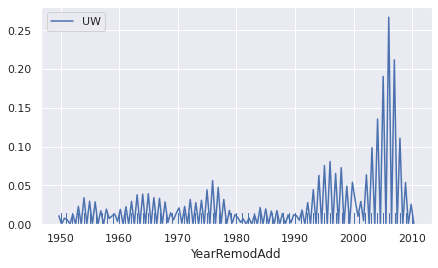

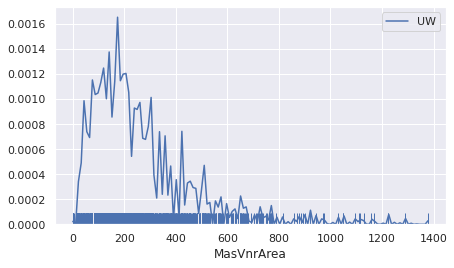

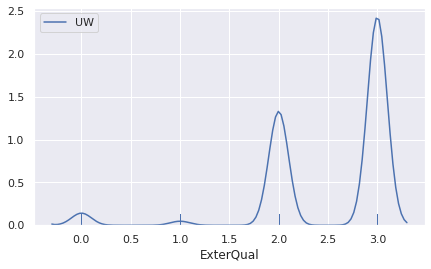

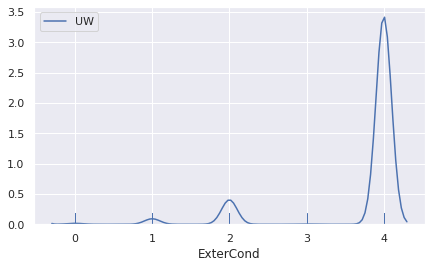

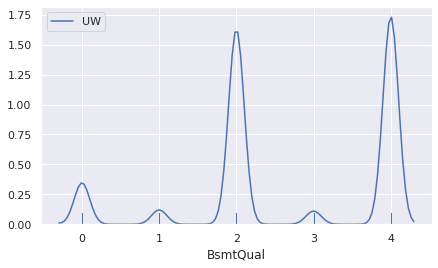

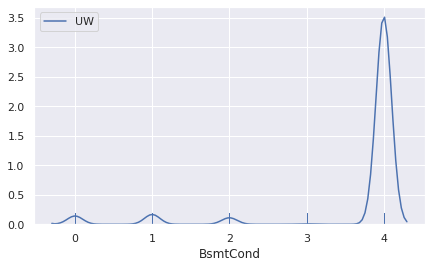

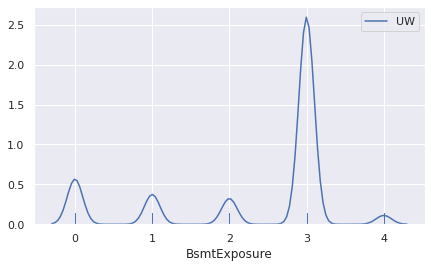

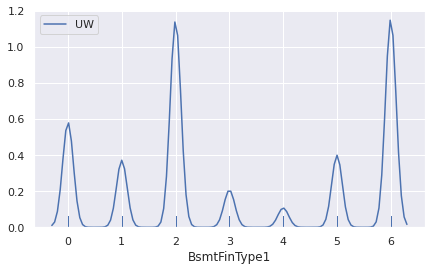

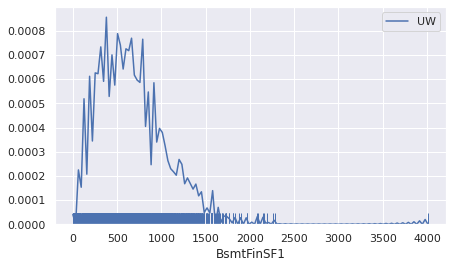

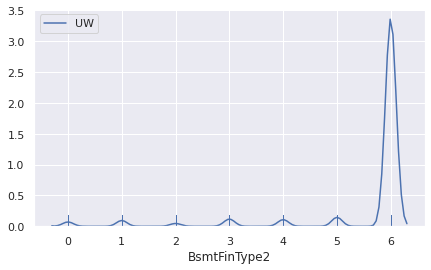

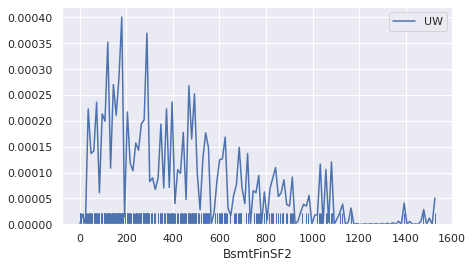

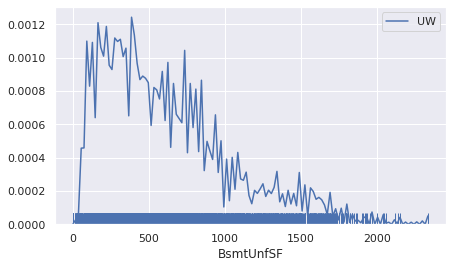

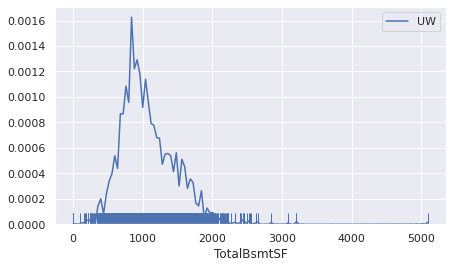

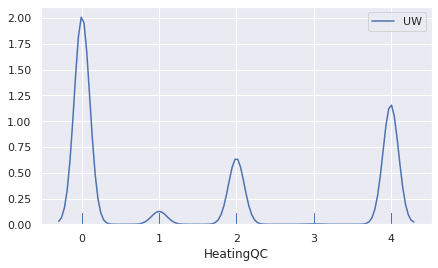

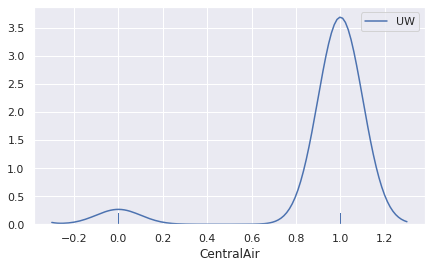

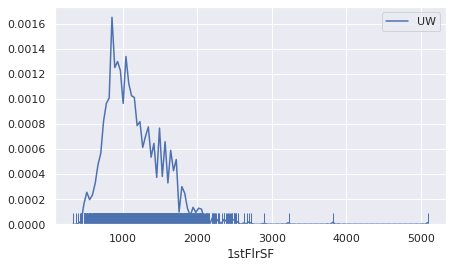

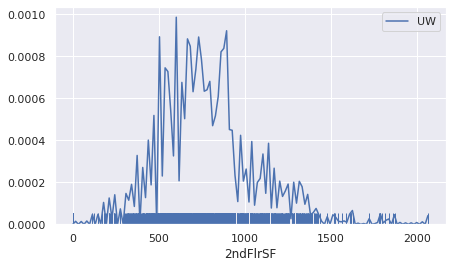

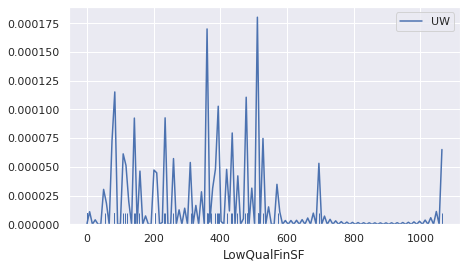

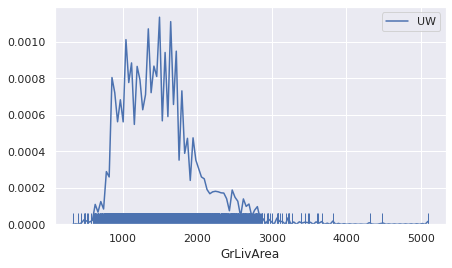

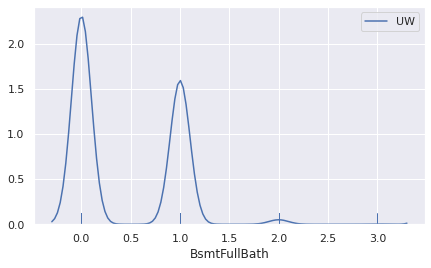

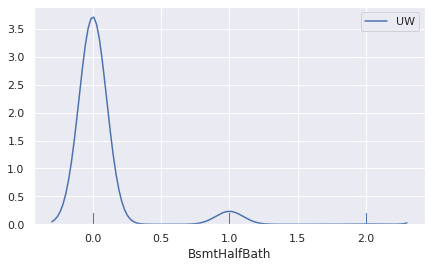

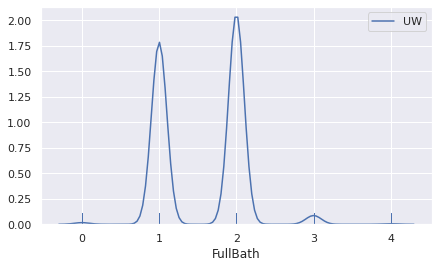

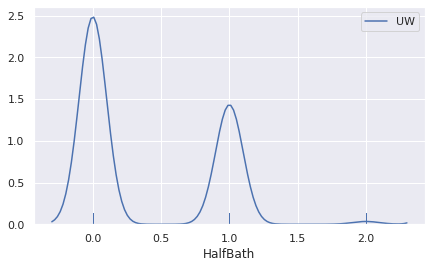

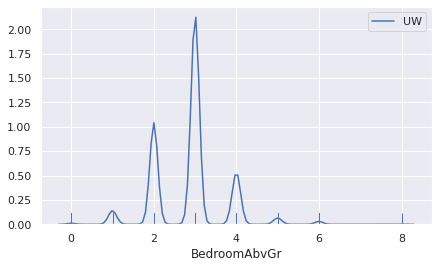

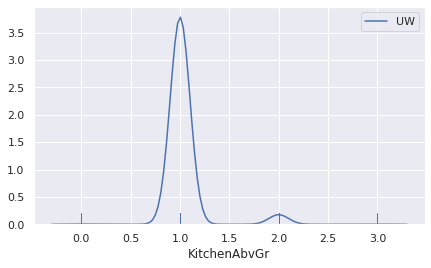

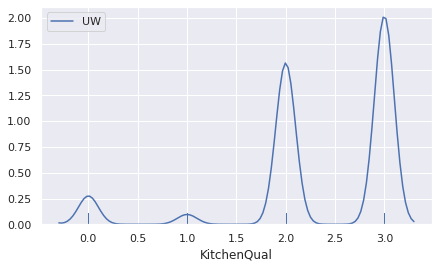

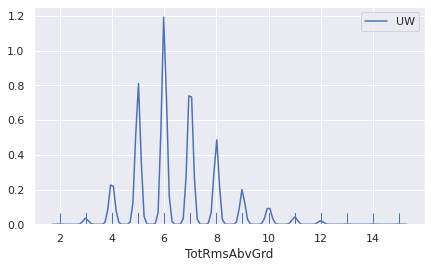

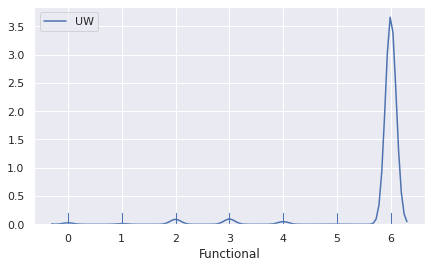

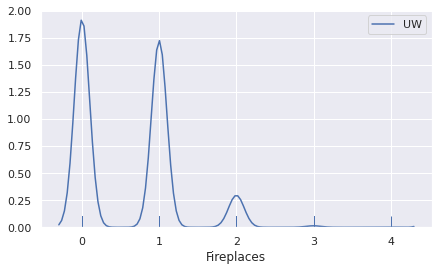

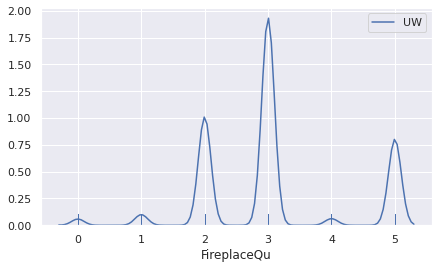

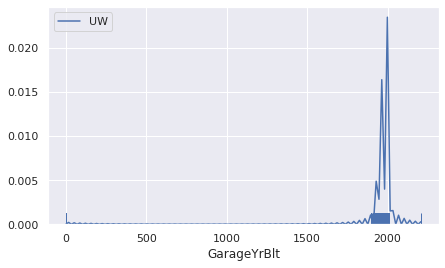

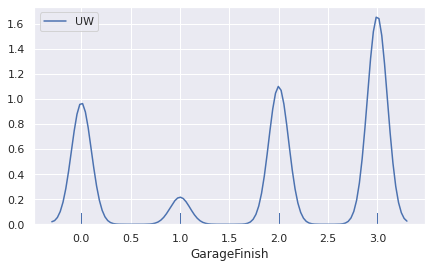

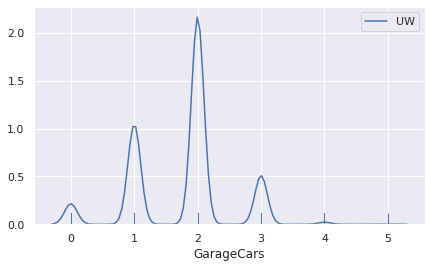

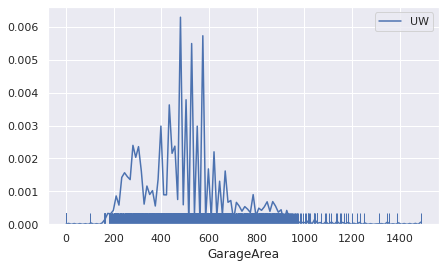

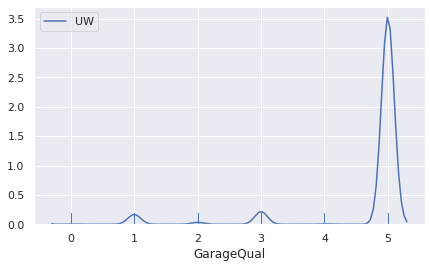

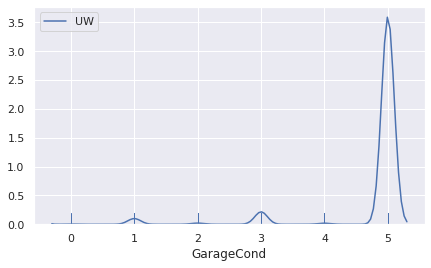

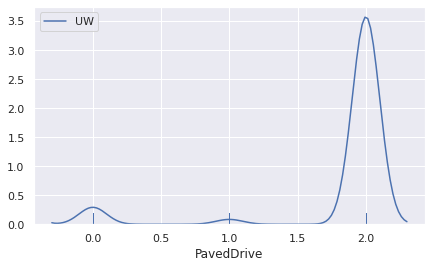

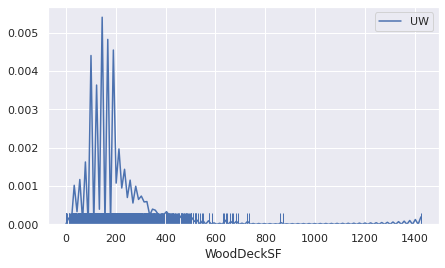

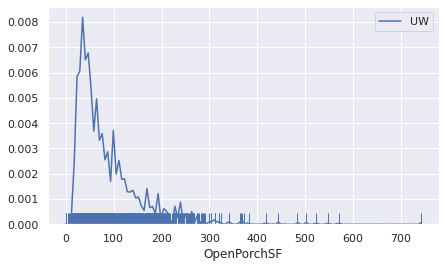

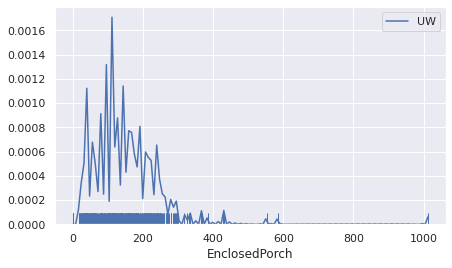

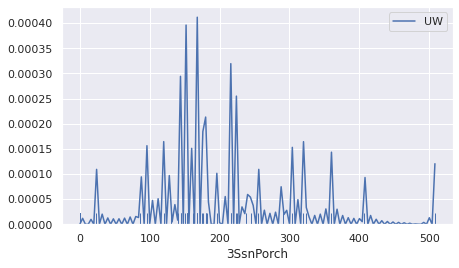

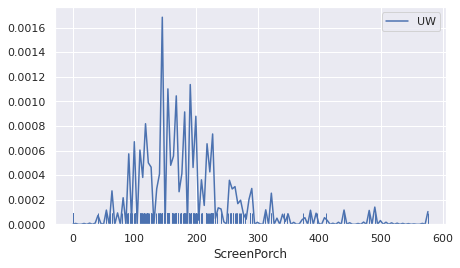

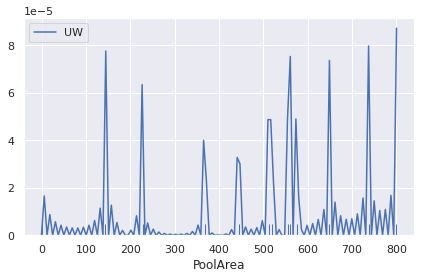

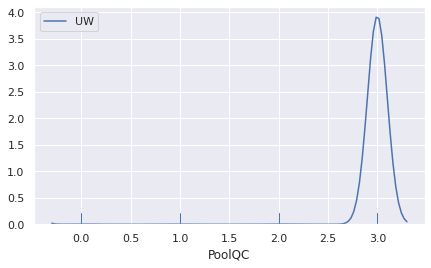

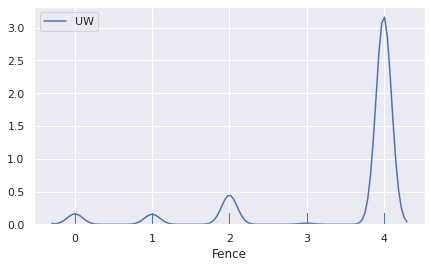

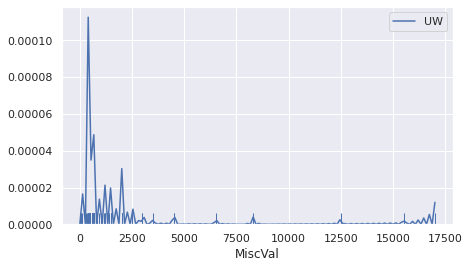

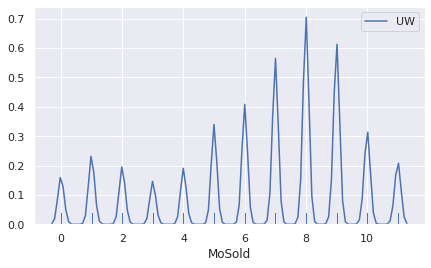

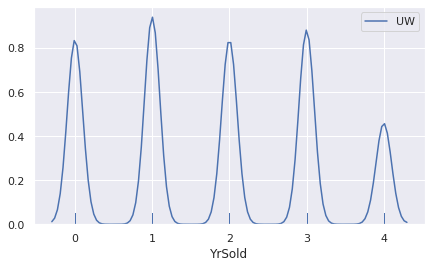

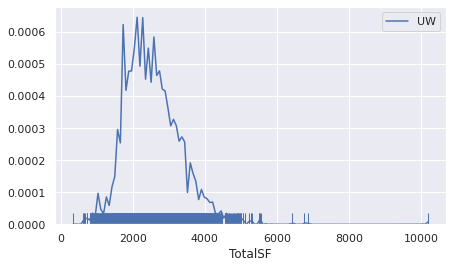

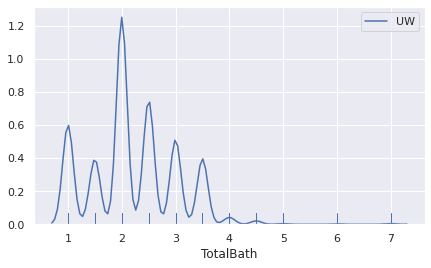

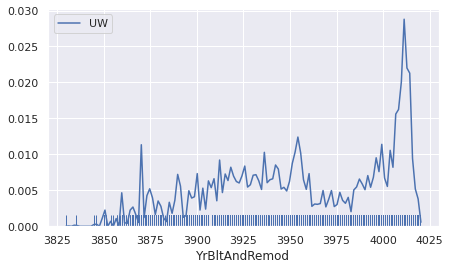

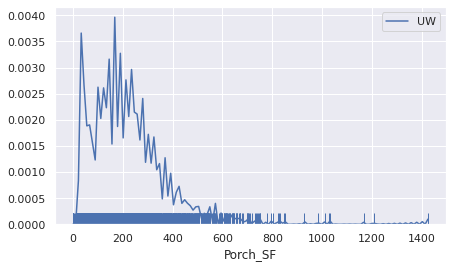

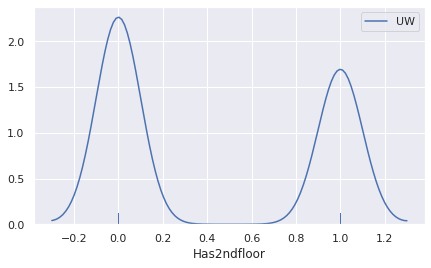

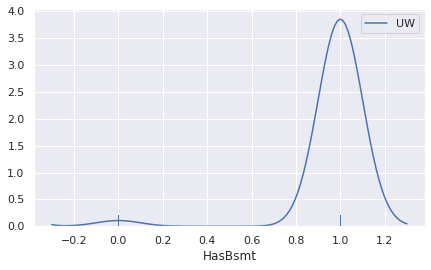

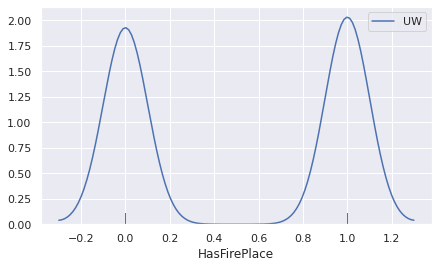

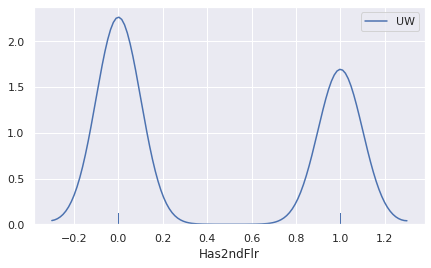

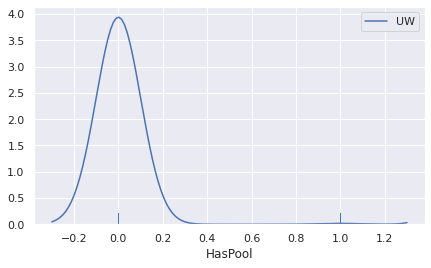

In [63]:
numerical_dataset = dataset.select_dtypes(exclude='object')

for i in range(len(numerical_dataset.columns)):
    f, ax = plt.subplots(figsize=(7, 4))
    fig = sns.distplot(numerical_dataset.iloc[:,i].dropna(), rug=True, hist=False, label='UW', kde_kws={'bw':0.1})
    plt.xlabel(numerical_dataset.columns[i])

Box-Cox Transformation on Skewed Features
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

In [0]:
skewness = skewed_features[abs(skewed_features) > 0.75]
skewed_features = skewness.index

lam = 0.15
for i in skewed_features:
    dataset[i] = boxcox1p(dataset[i], lam)

In [0]:
from datetime import datetime
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [67]:
# Hot-Encode Categorical features
dataset = pd.get_dummies(dataset) 

# Splitting dataset back into X and test data
X = dataset[:len(train)]
test = dataset[len(train):]

X.shape

(1457, 231)

Splitting data

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

In [0]:
# Indicate number of folds for cross validation
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

# Parameters for models
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]


In [70]:
# Lasso Model
lasso = make_pipeline(RobustScaler(), LassoCV(max_iter=1e7, alphas = alphas2, random_state = 42, cv=kfolds))

# Printing Lasso Score with Cross-Validation
lasso_score = cross_val_score(lasso, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lasso_rmse = np.sqrt(-lasso_score.mean())
print("LASSO RMSE: ", lasso_rmse)
print("LASSO STD: ", lasso_score.std())

LASSO RMSE:  0.11199712272723678
LASSO STD:  0.001437765590570898


In [71]:
# Training Model for later
lasso.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lassocv',
                 LassoCV(alphas=[5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                 0.0006, 0.0007, 0.0008],
                         copy_X=True,
                         cv=KFold(n_splits=5, random_state=42, shuffle=True),
                         eps=0.001, fit_intercept=True, max_iter=10000000.0,
                         n_alphas=100, n_jobs=None, normalize=False,
                         positive=False, precompute='auto', random_state=42,
                         selection='cyclic', tol=0.0001, verbose=False))],
         verbose=False)

In [72]:
# ridge model
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas = alphas_alt, cv=kfolds))
ridge_score = cross_val_score(ridge, X, y, cv=kfolds, scoring='neg_mean_squared_error')
ridge_rmse =  np.sqrt(-ridge_score.mean())
# Printing out Ridge Score and STD
print("RIDGE RMSE: ", ridge_rmse)
print("RIDGE STD: ", ridge_score.std())

RIDGE RMSE:  0.11294475568374102
RIDGE STD:  0.0015893398568506956


In [73]:
# Training Model for later
ridge.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([14.5, 14.6, 14.7, 14.8, 14.9, 15. , 15.1, 15.2, 15.3, 15.4, 15.5]),
                         cv=KFold(n_splits=5, random_state=42, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False)

In [74]:
# elastic net
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(max_iter=1e7, alphas=e_alphas, cv=kfolds, l1_ratio=e_l1ratio))
elastic_score = cross_val_score(elasticnet, X, y, cv=kfolds, scoring='neg_mean_squared_error')
elastic_rmse =  np.sqrt(-elastic_score.mean())

# Printing out ElasticNet Score and STD
print("ELASTICNET RMSE: ", elastic_rmse)
print("ELASTICNET STD: ", elastic_score.std())

ELASTICNET RMSE:  0.11197776987682875
ELASTICNET STD:  0.0014402172628530051


In [75]:
# Training Model for later
elasticnet.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('elasticnetcv',
                 ElasticNetCV(alphas=[0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                      0.0006, 0.0007],
                              copy_X=True,
                              cv=KFold(n_splits=5, random_state=42, shuffle=True),
                              eps=0.001, fit_intercept=True,
                              l1_ratio=[0.8, 0.85, 0.9, 0.95, 0.99, 1],
                              max_iter=10000000.0, n_alphas=100, n_jobs=None,
                              normalize=False, positive=False,
                              precompute='auto', random_state=None,
                              selection='cyclic', tol=0.0001, verbose=0))],
         verbose=False)

In [76]:
# lightgbm
lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=5,
                                      learning_rate=0.05, n_estimators=720,
                                      max_bin = 55, bagging_fraction = 0.8,
                                      bagging_freq = 5, feature_fraction = 0.2319,
                                      feature_fraction_seed=9, bagging_seed=9,
                                      min_data_in_leaf =6, 
                                      min_sum_hessian_in_leaf = 11))

# Printing out LightGBM Score and STD
lightgbm_score = cross_val_score(lightgbm, X, y, cv=kfolds, scoring='neg_mean_squared_error')
lightgbm_rmse = np.sqrt(-lightgbm_score.mean())
print("LIGHTGBM RMSE: ", lightgbm_rmse)
print("LIGHTGBM STD: ", lightgbm_score.std())

LIGHTGBM RMSE:  0.11888663726351022
LIGHTGBM STD:  0.002284132424975857


In [77]:
# Training Model for later
lightgbm.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lgbmregressor',
                 LGBMRegressor(bagging_fraction=0.8, bagging_freq=5,
                               bagging_seed=9, boosting_type='gbdt',
                               class_weight=None, colsample_bytree=1.0,
                               feature_fraction=0.2319, feature_fraction_seed=9,
                               importance_type='split', learning_rate=0.05,
                               max_bin=55, max_depth=-1, min_child_samples=20,
                               min_child_weight=0.001, min_data_in_leaf=6,
                               min_split_gain=0.0, min_sum_hessian_in_leaf=11,
                               n_estimators=720, n_jobs=-1, num_leaves=5,
                               objective='regression', random_state=None,
                     

In [78]:
# xgboost
xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.01, n_estimators=3460, 
                                     max_depth=3,min_child_weight=0 ,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,
                                     scale_pos_weight=1,seed=27, 
                                     reg_alpha=0.00006))

# Printing out XGBOOST Score and STD
xgboost_score = cross_val_score(xgboost, X, y, cv=kfolds, scoring='neg_mean_squared_error')
xgboost_rmse = np.sqrt(-xgboost_score.mean())
print("XGBOOST RMSE: ", xgboost_rmse)
print("XGBOOST STD: ", xgboost_score.std())


[20:20:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:21:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:22:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBOOST RMSE:  0.11511561859897342
XGBOOST STD:  0.0016932944606712203


In [82]:
# Training Model for later
xgboost.fit(X_train, y_train)

[20:23:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('xgbregressor',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.7, gamma=0,
                              importance_type='gain', learning_rate=0.01,
                              max_delta_step=0, max_depth=3, min_child_weight=0,
                              missing=None, n_estimators=3460, n_jobs=1,
                              nthread=4, objective='reg:linear', random_state=0,
                              reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
                              seed=27, silent=None, subsample=0.7,
                              verbosity=1))],
         verbose=False)

 Model Performance

In [79]:
results = pd.DataFrame({
    'Model':['Lasso',
            'Ridge',
            'ElasticNet',
            'LightGBM',
            'XGBOOST',
            ],
    'Score':[lasso_rmse,
             ridge_rmse,
             elastic_rmse,
             lightgbm_rmse,
             xgboost_rmse,
             
            ]})

sorted_result = results.sort_values(by='Score', ascending=True).reset_index(drop=True)
sorted_result


,Model,Score
0,ElasticNet,0.111978
1,Lasso,0.111997
2,Ridge,0.112945
3,XGBOOST,0.115116
4,LightGBM,0.118887


Text(0.5, 1.0, 'RMSE')

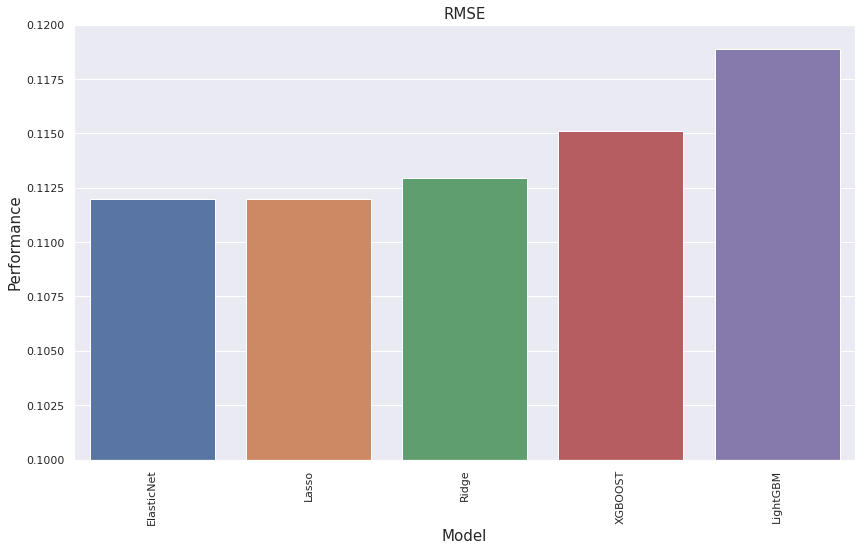

In [80]:
f, ax = plt.subplots(figsize=(14,8))
plt.xticks(rotation='90')
sns.barplot(x=sorted_result['Model'], y=sorted_result['Score'])
plt.xlabel('Model', fontsize=15)
plt.ylabel('Performance', fontsize=15)
plt.ylim(0.10, 0.12)
plt.title('RMSE', fontsize=15)

In [0]:
# Predict every model
lasso_pred = lasso.predict(test)
ridge_pred = ridge.predict(test)
elasticnet_pred = elasticnet.predict(test)
lightgbm_pred = lightgbm.predict(test)
xgboost_pred = xgboost.predict(test)

In [0]:
# Combine predictions into final predictions
final_predictions = np.expm1((0.3*elasticnet_pred) + (0.3*lasso_pred) + (0.2*ridge_pred) + 
               (0.1*xgboost_pred) + (0.1*lightgbm_pred))

In [85]:
final_predictions

array([117305.278836  , 154727.83156572, 180209.56477938, ...,
       170593.08432951, 117783.96120238, 224903.03793429])

In [86]:
final_predictions

NameError: ignored

In [0]:
test_Id=test['Id']

In [0]:
final = pd.DataFrame()
final['Id'] = test_Id
final['SalePrice'] = final_predictions
final.to_csv('house_pricing_final.csv',index=False)

In [92]:
pd.read_csv("house_pricing_final.csv")

,Id,SalePrice
0,1461,117305.278836
1,1462,154727.831566
2,1463,180209.564779
3,1464,193678.874871
4,1465,189802.191483
...,...,...
1454,2915,86494.027983
1455,2916,81268.057311
1456,2917,170593.084330
1457,2918,117783.961202
